# The importance of diversification in a portfolio under the CAPM model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [12]:
#%pip install matplotlib-venn
#%pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [13]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
from dataproject import StockData


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


New try using the PY-file way more than before.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,102.807134,103.929729,101.754317,102.896632,101.144880,1.058799e+08,0.001185
std,54.805248,55.376861,54.256942,54.845197,55.262035,5.365632e+07,0.018777
min,28.950001,29.082500,28.690001,29.004999,26.959063,2.404830e+07,-0.128647
25%,46.929376,47.290626,46.503751,46.973749,44.791506,7.077085e+07,-0.007559
50%,110.451248,112.320000,108.813751,110.389999,108.149426,9.216420e+07,0.000893
75%,151.190002,153.287498,149.927498,151.339996,150.132587,1.261926e+08,0.010544
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.479400e+08,0.119808


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,124.208224,125.420143,122.937248,124.182253,108.118284,8.634918e+06,0.000536
std,26.894823,27.082769,26.688267,26.912746,31.406659,4.630659e+06,0.019802
min,55.259998,58.490002,51.599998,54.220001,45.317291,1.640100e+06,-0.221248
25%,106.949997,107.762497,105.987499,106.847498,86.738319,5.806175e+06,-0.007709
50%,118.355000,119.255001,117.439999,118.274998,96.132305,7.521250e+06,0.000737
75%,148.097504,149.277496,145.804996,147.580006,143.261757,1.012775e+07,0.008751
max,187.119995,189.679993,186.179993,188.050003,178.740128,5.723100e+07,0.227407


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,52.584452,52.944232,52.204364,52.576365,47.317078,1.419623e+07,0.000396
std,6.843534,6.883937,6.794504,6.849499,8.971716,6.391772e+06,0.011990
min,38.759998,38.889999,36.270000,37.560001,32.094234,2.996300e+06,-0.096725
25%,46.107500,46.367499,45.860001,46.080002,38.771408,1.025770e+07,-0.004733
50%,53.020000,53.395000,52.565001,53.025000,46.784452,1.288415e+07,0.000692
75%,59.250000,59.650000,58.770000,59.237499,56.848198,1.606878e+07,0.005969
max,67.000000,67.199997,65.720001,66.209999,62.319366,6.784570e+07,0.064796


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,214.324002,215.907445,212.712824,214.339644,199.322878,3.287625e+06,0.000643
std,47.086060,47.306245,46.816290,47.067030,52.819203,1.536566e+06,0.013482
min,118.930000,119.739998,118.180000,119.480003,100.620804,9.632000e+05,-0.158753
25%,173.590004,174.532501,172.367496,173.502495,150.360786,2.369275e+06,-0.005084
50%,213.010002,214.699997,211.339996,212.849998,195.197556,2.936250e+06,0.000681
75%,253.207500,255.369999,251.105000,253.307499,243.216560,3.709975e+06,0.006543
max,300.950012,302.390015,299.309998,300.529999,298.829773,1.766210e+07,0.181254


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,31.253618,31.598169,30.907056,31.252812,28.703716,5.827184e+07,0.000574
std,6.209880,6.257163,6.154673,6.201696,6.404639,2.590219e+07,0.020358
min,19.260000,19.670000,17.950001,18.080000,16.361561,1.380540e+07,-0.153973
25%,27.090000,27.402500,26.737500,27.007500,24.238401,4.097392e+07,-0.009170
50%,29.990000,30.240000,29.660000,29.980000,27.200106,5.151200e+07,0.000352
75%,34.412499,34.812501,34.080000,34.470001,32.972404,6.808665e+07,0.010360
max,49.910000,50.110001,49.029999,49.380001,46.471870,2.595458e+08,0.177962


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,100.278355,101.313048,99.234095,100.279375,96.837207,7.571193e+06,0.000536
std,31.067600,31.354797,30.714940,31.012852,31.058225,4.199420e+06,0.019503
min,50.799999,51.070000,50.349998,50.830002,47.433575,1.821900e+06,-0.128081
25%,77.355000,78.009998,76.199997,77.155003,72.749052,5.251575e+06,-0.008544
50%,98.500000,99.545002,97.720001,98.615002,95.724361,6.578750e+06,0.000364
75%,122.610001,124.085001,120.985003,122.392500,120.247236,8.558225e+06,0.010320
max,176.350006,179.100006,175.500000,177.509995,172.454773,4.817610e+07,0.155314


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


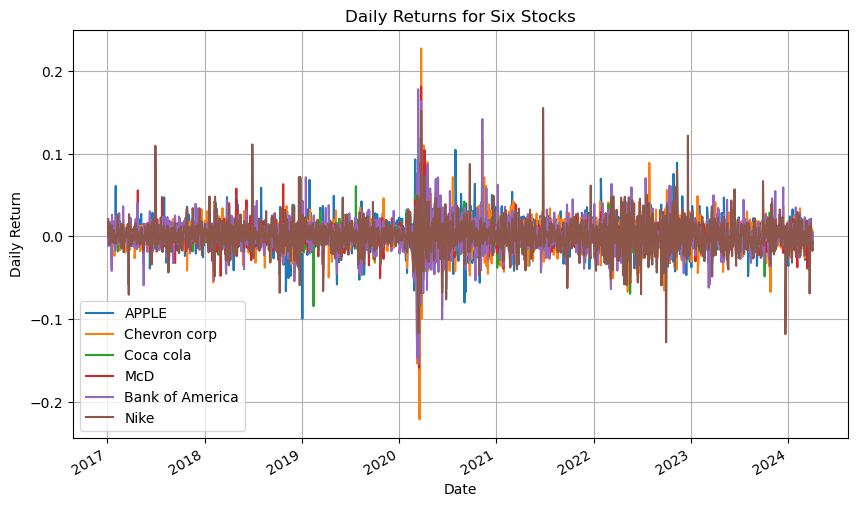

In [14]:
SD = StockData(['AAPL', 'CVX', 'KO', 'MCD', 'BAC', 'NKE'], 2017, 2024)

# Call the six_stocks_ method to calculate daily returns and get the DataFrame
df = SD.six_stocks_()

# Plot the DataFrame with explicit legend labels
df.plot(figsize=(10, 6))
plt.title('Daily Returns for Six Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')

# Set legend labels to ticker symbols
plt.legend(['APPLE', 'Chevron corp', 'Coca cola', 'McD', 'Bank of America', 'Nike'])

plt.grid(True)
plt.show()


In [15]:
# Call the expected_return_ method to get the filtered DataFrame
expected_returns_df_filtered = SD.expected_return_()

# Display the filtered DataFrame containing the expected returns with company names
display(expected_returns_df_filtered)

,Expected Return (%)
Ticker,
Apple Inc.,0.118518
Chevron Corporation,0.053565
The Coca-Cola Company,0.039587
McDonald's Corporation,0.064281
Bank of America Corporation,0.057442
"Nike, Inc.",0.053610


In [16]:
print("Covariance Matrix for Two Stocks:")
display(SD.two_stocks_covariance())

print("Covariance Matrix for Four Stocks:")
display(SD.four_stocks_covariance())

print("Covariance Matrix for Six Stocks:")
display(SD.six_stocks_covariance())

Covariance Matrix for Two Stocks:


,AAPL,CVX
AAPL,0.000353,0.000128
CVX,0.000128,0.000392


Covariance Matrix for Four Stocks:


,AAPL,CVX,KO,MCD
AAPL,0.000353,0.000128,0.000088,0.000110
CVX,0.000128,0.000392,0.000100,0.000119
KO,0.000088,0.000100,0.000144,0.000086
MCD,0.000110,0.000119,0.000086,0.000182


Covariance Matrix for Six Stocks:


,AAPL,CVX,KO,MCD,BAC,NKE
AAPL,0.000353,0.000128,0.000088,0.000110,0.000165,0.000178
CVX,0.000128,0.000392,0.000100,0.000119,0.000245,0.000142
KO,0.000088,0.000100,0.000144,0.000086,0.000111,0.000094
MCD,0.000110,0.000119,0.000086,0.000182,0.000126,0.000114
BAC,0.000165,0.000245,0.000111,0.000126,0.000414,0.000182
NKE,0.000178,0.000142,0.000094,0.000114,0.000182,0.000380


Next step will be to find the invers of the covariance-matrices above.

In [17]:
print("Invers Covariance Matrix for Two Stocks:")
display(SD.calculate_invers_covariance("two"))

print("Invers Covariance Matrix for Four Stocks:")
display(SD.calculate_invers_covariance("four"))

print("Invers Covariance Matrix for Six Stocks:")
display(SD.calculate_invers_covariance("six"))

Invers Covariance Matrix for Two Stocks:


,AAPL,CVX
AAPL,3216.206232,-1048.116280
CVX,-1048.116280,2891.839554


Invers Covariance Matrix for Four Stocks:


,AAPL,CVX,KO,MCD
AAPL,3733.958901,-511.851524,-1076.402567,-1421.417359
CVX,-511.851524,3450.157407,-1269.859031,-1352.280061
KO,-1076.402567,-1269.859031,10579.180355,-3501.783904
MCD,-1421.417359,-1352.280061,-3501.783904,8900.474706


Invers Covariance Matrix for Six Stocks:


,AAPL,CVX,KO,MCD,BAC,NKE
AAPL,4243.351933,-76.135712,-659.401804,-1027.000709,-639.332379,-1178.268747
CVX,-76.135712,4359.370973,-750.352623,-979.729069,-1975.072756,-168.519118
KO,-659.401804,-750.352623,10969.958208,-3168.228698,-956.797407,-709.843323
MCD,-1027.000709,-979.729069,-3168.228698,9208.173588,-588.680687,-857.280603
BAC,-639.332379,-1975.072756,-956.797407,-588.680687,4604.315434,-755.461013
NKE,-1178.268747,-168.519118,-709.843323,-857.280603,-755.461013,4038.476756


In [22]:
display(SD.one_vector("two"))
display(SD.one_vector("four"))
display(SD.one_vector("six"))

array([[1.],
       [1.]])

array([[1.],
       [1.],
       [1.],
       [1.]])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [25]:
display(SD.calculate_z_vector("two"))
display(SD.calculate_z_vector("four"))
display(SD.calculate_z_vector("six"))

array([[2168.08995163],
       [1843.72327438]])

array([[ 724.2874518 ],
       [ 316.1667909 ],
       [4731.13485261],
       [2624.99338219]])

array([[ 663.21258187],
       [ 409.56169391],
       [4725.33435315],
       [2587.25382214],
       [-311.02880887],
       [ 369.10395151]])

In [27]:
display(SD.normalize_z_vector("two"))
display(SD.normalize_z_vector("four"))
display(SD.normalize_z_vector("six"))

array([[0.54042644],
       [0.45957356]])

array([[0.08625979],
       [0.03765422],
       [0.56345958],
       [0.3126264 ]])

array([[ 0.0785477 ],
       [ 0.04850651],
       [ 0.5596458 ],
       [ 0.30642186],
       [-0.03683675],
       [ 0.04371489]])

In [32]:
display(SD.check_results)

<bound method StockData.check_results of <dataproject.StockData object at 0x0000024298B18810>>

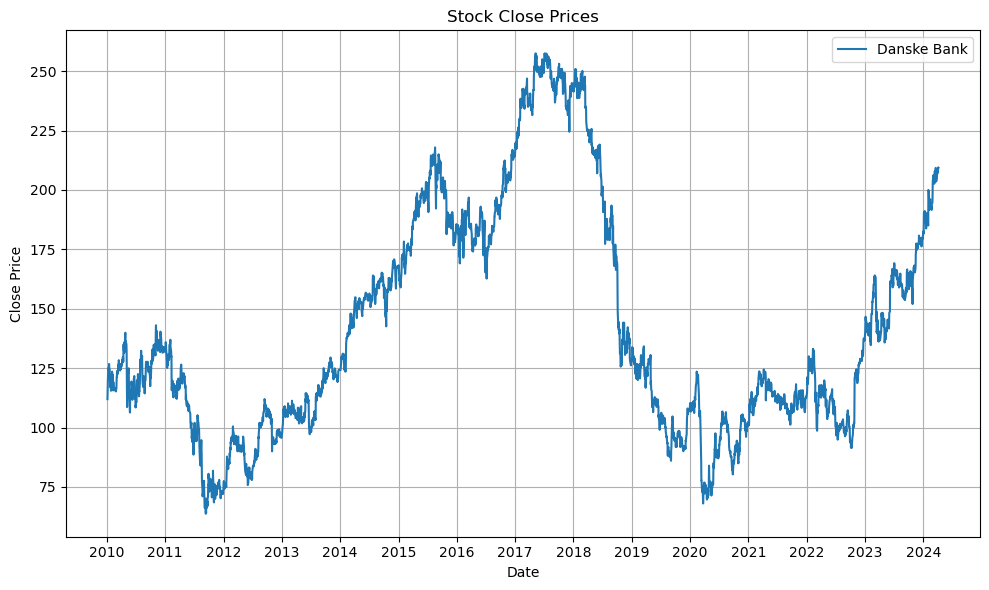

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have already loaded danske DataFrame

# Convert 'Date' column to datetime
danske['Date'] = pd.to_datetime(danske['Date'])

plt.figure(figsize=(10, 6))
plt.plot(danske['Date'], danske['Close'], label='Danske Bank')
plt.title('Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Format x-axis ticks to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Read and clean data

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


NameError: name 'widgets' is not defined

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

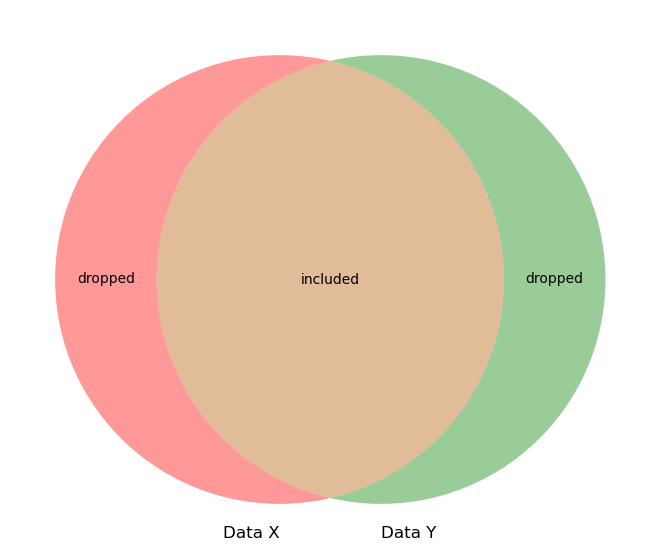

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.